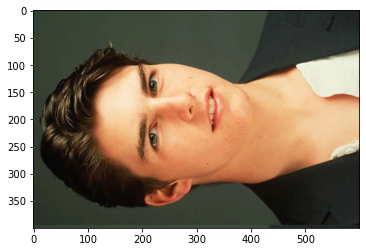

In [1]:
# cnn_face detector
import os
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

my_image_path = os.getenv('HOME')+'/Project/[Pr.3] camera_sticker/images/tom_rotate.jpeg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

mmod_rectangles[[(148, 78) (351, 282)]]


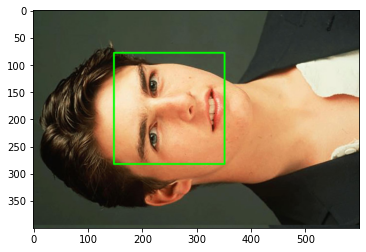

In [2]:
file_path = os.getenv('HOME')+ '/Project/[Pr.3] camera_sticker/models/mmod_human_face_detector.dat'
cnn_face_detector = dlib.cnn_face_detection_model_v1(file_path)
faces_cnn = cnn_face_detector(img_bgr, 1)

print(faces_cnn)   # 찾은 얼굴영역 좌표

for face in faces_cnn:
    l = face.rect.left()
    t = face.rect.top()
    r = face.rect.right()
    b = face.rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [3]:
model_path = os.getenv('HOME')+'/Project/[Pr.3] camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [4]:
!pip install imutils

In [5]:
from imutils import face_utils

list_landmarks = []
# print(faces_cnn)
# print(faces_cnn[0])

'''
for face in faces_cnn:
    # print(face)
    points = face_utils.shape_to_np(landmark_predictor(img_rgb, face))
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
'''

# faceRect = faces_cnn.rectangles()
# landmarks = face_utils.shape_to_np(landmark_predictor(img_rgb, faceRect))


rects = dlib.rectangles()
rects.extend([face.rect for face in faces_cnn])

for face in rects:
    # print(face)
    points = landmark_predictor(img_rgb, face)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


print(len(list_landmarks))

1


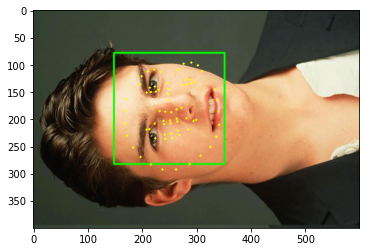

In [6]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # print(idx)
        # print(point)
        # print(type(point))
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        
        
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 실패

90도 회전했을 때, landmark를 전혀 못찾고 있음..

그래서 억지로 90도 변환해서 진행해보기로 함.


In [7]:
print(landmark_predictor)

In [8]:
print(list_landmarks)

[[(169, 163), (168, 184), (168, 208), (172, 230), (183, 252), (197, 269), (216, 283), (237, 292), (262, 292), (287, 282), (307, 267), (325, 251), (336, 232), (341, 210), (340, 186), (337, 165), (333, 145), (196, 136), (199, 121), (210, 112), (222, 109), (233, 113), (265, 109), (276, 98), (290, 96), (302, 101), (309, 112), (247, 134), (247, 144), (248, 154), (248, 165), (232, 185), (242, 186), (253, 187), (263, 182), (272, 179), (208, 151), (214, 142), (223, 140), (231, 146), (225, 149), (216, 150), (273, 137), (280, 128), (288, 126), (296, 131), (290, 134), (282, 136), (208, 219), (223, 208), (239, 203), (251, 202), (263, 199), (281, 198), (299, 201), (284, 219), (268, 229), (255, 234), (242, 236), (224, 235), (213, 218), (240, 209), (252, 207), (264, 204), (294, 203), (265, 221), (253, 226), (241, 228)]]


In [9]:
print(type(list_landmarks))

<class 'list'>


In [10]:
print(len(list_landmarks[0]))

68


In [11]:
rotate_list_landmarks = []
# (x,y) -> (y, -x)

for i in range(len(list_landmarks[0])):
    (x, y) = list_landmarks[0][i]
    # print((x, y))
    
    (x, y) = (y, -x)
    # print(x, y)
    rotate_list_landmarks.append((x, y))
    

rotate_list_landmarks = [rotate_list_landmarks]
print(rotate_list_landmarks)
    

[[(163, -169), (184, -168), (208, -168), (230, -172), (252, -183), (269, -197), (283, -216), (292, -237), (292, -262), (282, -287), (267, -307), (251, -325), (232, -336), (210, -341), (186, -340), (165, -337), (145, -333), (136, -196), (121, -199), (112, -210), (109, -222), (113, -233), (109, -265), (98, -276), (96, -290), (101, -302), (112, -309), (134, -247), (144, -247), (154, -248), (165, -248), (185, -232), (186, -242), (187, -253), (182, -263), (179, -272), (151, -208), (142, -214), (140, -223), (146, -231), (149, -225), (150, -216), (137, -273), (128, -280), (126, -288), (131, -296), (134, -290), (136, -282), (219, -208), (208, -223), (203, -239), (202, -251), (199, -263), (198, -281), (201, -299), (219, -284), (229, -268), (234, -255), (236, -242), (235, -224), (218, -213), (209, -240), (207, -252), (204, -264), (203, -294), (221, -265), (226, -253), (228, -241)]]


In [12]:
print(type(rotate_list_landmarks))

<class 'list'>


In [13]:
print(type(rotate_list_landmarks[0][0]))

<class 'tuple'>


(163, -169)
(184, -168)
(208, -168)
(230, -172)
(252, -183)
(269, -197)
(283, -216)
(292, -237)
(292, -262)
(282, -287)
(267, -307)
(251, -325)
(232, -336)
(210, -341)
(186, -340)
(165, -337)
(145, -333)
(136, -196)
(121, -199)
(112, -210)
(109, -222)
(113, -233)
(109, -265)
(98, -276)
(96, -290)
(101, -302)
(112, -309)
(134, -247)
(144, -247)
(154, -248)
(165, -248)
(185, -232)
(186, -242)
(187, -253)
(182, -263)
(179, -272)
(151, -208)
(142, -214)
(140, -223)
(146, -231)
(149, -225)
(150, -216)
(137, -273)
(128, -280)
(126, -288)
(131, -296)
(134, -290)
(136, -282)
(219, -208)
(208, -223)
(203, -239)
(202, -251)
(199, -263)
(198, -281)
(201, -299)
(219, -284)
(229, -268)
(234, -255)
(236, -242)
(235, -224)
(218, -213)
(209, -240)
(207, -252)
(204, -264)
(203, -294)
(221, -265)
(226, -253)
(228, -241)


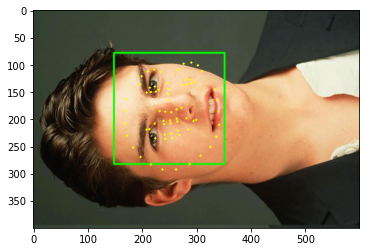

In [14]:
for landmark in rotate_list_landmarks:
    for point in landmark:
        print(point)
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        
             
rotate_img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(rotate_img_show_rgb)
plt.show()

### 정리

처음에는 hog_detector로 얼굴 bbox가 인식되지 않아서 검색해보다가 hog보다 상대적으로 cnn detector가 얼굴 인식에서 성능이 더 좋다는 글을 보고 dlib.cnn_face_detection_model_v1을 활용해 진행하였다.

bbox 인식까지는 어찌저찌 된거 같은데, landmark를 출력하는 부분에서 자꾸 정면 사진으로 출력을 해서 난감했다.

그래서 회전 변환을 이용해 90도 반시계방향으로 landmark를 회전해서 찍어보려 하였다.
point 하나하나 -90도 회전한 것은 확인했지만, 어째서 plt.plot으로 찍어보면 회전하기 전의 점들이 찍히는지 모르겠다..

억지로라도 landmark를 인식시켜서 스티커를 붙여보려 했는데 결국은 하지못했다 ㅠㅠㅠ =ㅁ=;